<a href="https://colab.research.google.com/github/audwls4545/metaverse/blob/main/%EC%97%B0%EA%B4%80%EB%B6%84%EC%84%9D(%EC%9E%A5%EB%B0%94%EA%B5%AC%EB%8B%88%EB%B6%84%EC%84%9D)_230502.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## 코렙에서 차트 한글 작업을 위해 실행
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [2]:
#### 도구-런타임 다시시작
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

▶ Part1. 지지도/신뢰도향상도 계산

In [5]:
##############################
##  데이터셋 임의 제작
################################

dataset=[['사과','치즈','생수'],
               ['생수','호두','치즈','고등어'],
               ['수박','사과','생수'],
               ['생수','호두','치즈','옥수수']]
type(dataset)
dataset[0]

['사과', '치즈', '생수']

In [6]:
##############################
##  리스트자료 -> 연관분석 셋으로 변환
################################

import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

te = TransactionEncoder()
te.fit(dataset)
print(te.columns_)

te_ary = te.fit(dataset).transform(dataset)
te_ary

['고등어', '사과', '생수', '수박', '옥수수', '치즈', '호두']


array([[False,  True,  True, False, False,  True, False],
       [ True, False,  True, False, False,  True,  True],
       [False,  True,  True,  True, False, False, False],
       [False, False,  True, False,  True,  True,  True]])

In [7]:
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,고등어,사과,생수,수박,옥수수,치즈,호두
0,False,True,True,False,False,True,False
1,True,False,True,False,False,True,True
2,False,True,True,True,False,False,False
3,False,False,True,False,True,True,True


In [8]:
### 단일변수 지지도계산
## 빈도수 계산 -> 지지도(support) 확인
frequent_itemsets = apriori(df,use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.50,(사과)
1,1.00,(생수)
2,0.75,(치즈)
3,0.50,(호두)
4,0.50,"(사과, 생수)"
5,0.75,"(치즈, 생수)"
6,0.50,"(호두, 생수)"
7,0.50,"(치즈, 호두)"
8,0.50,"(호두, 치즈, 생수)"


In [9]:
### 지지도 하한선 정하기
##min_support에 넣어서 지지도 하한선 정할 수 있음
frequent_itemsets=apriori(df,min_support=0.0,use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.25,(고등어)
1,0.50,(사과)
2,1.00,(생수)
3,0.25,(수박)
4,0.25,(옥수수)
...,...,...
122,0.00,"(옥수수, 치즈, 호두, 고등어, 사과, 생수)"
123,0.00,"(옥수수, 치즈, 호두, 수박, 고등어, 사과)"
124,0.00,"(옥수수, 치즈, 호두, 수박, 고등어, 생수)"
125,0.00,"(옥수수, 치즈, 호두, 수박, 사과, 생수)"


In [10]:
## item 조합 갯수가 특정갯수 이상의 item만 추출
print(frequent_itemsets[:8])
#len(frequent_itemsets['itemsets'][7])
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x)) 
frequent_itemsets[frequent_itemsets['length'] <=2] 

   support   itemsets
0     0.25      (고등어)
1     0.50       (사과)
2     1.00       (생수)
3     0.25       (수박)
4     0.25      (옥수수)
5     0.75       (치즈)
6     0.50       (호두)
7     0.00  (고등어, 사과)


,support,itemsets,length
0,0.25,(고등어),1
1,0.50,(사과),1
2,1.00,(생수),1
3,0.25,(수박),1
4,0.25,(옥수수),1
5,0.75,(치즈),1
6,0.50,(호두),1
7,0.00,"(고등어, 사과)",2
8,0.25,"(고등어, 생수)",2
9,0.00,"(수박, 고등어)",2


In [11]:
# # 특정 아이템(치즈)이 포함된 것만 추출
frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: '치즈' in x)] 

,support,itemsets,length
5,0.75,(치즈),1
11,0.25,"(고등어, 치즈)",2
16,0.25,"(치즈, 사과)",2
20,0.75,"(치즈, 생수)",2
23,0.00,"(수박, 치즈)",2
...,...,...,...
122,0.00,"(옥수수, 치즈, 호두, 고등어, 사과, 생수)",6
123,0.00,"(옥수수, 치즈, 호두, 수박, 고등어, 사과)",6
124,0.00,"(옥수수, 치즈, 호두, 수박, 고등어, 생수)",6
125,0.00,"(옥수수, 치즈, 호두, 수박, 사과, 생수)",6


In [12]:
from mlxtend.frequent_patterns import apriori,association_rules

# metric 에는 지지도(support), 신뢰도(confidence), 향상도(lift) 사용가능
# 값의 최소옵션은 min_threshold에 기입함.
# antecedents(전례: x값)  / consequents(결과: y값)

rules=association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)
rules

/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/association_rules.py:105: RuntimeWarning: invalid value encountered in double_scalars
  "confidence": lambda sAC, sA, _: sAC/sA,


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(고등어),(생수),0.25,1.00,0.25,1.000000,1.000000,0.0000,inf
1,(생수),(고등어),1.00,0.25,0.25,0.250000,1.000000,0.0000,1.000
2,(고등어),(치즈),0.25,0.75,0.25,1.000000,1.333333,0.0625,inf
3,(치즈),(고등어),0.75,0.25,0.25,0.333333,1.333333,0.0625,1.125
4,(고등어),(호두),0.25,0.50,0.25,1.000000,2.000000,0.1250,inf
...,...,...,...,...,...,...,...,...,...
103,"(치즈, 생수)","(옥수수, 호두)",0.75,0.25,0.25,0.333333,1.333333,0.0625,1.125
104,(호두),"(옥수수, 치즈, 생수)",0.50,0.25,0.25,0.500000,2.000000,0.1250,1.500
105,(옥수수),"(호두, 치즈, 생수)",0.25,0.50,0.25,1.000000,2.000000,0.1250,inf
106,(치즈),"(옥수수, 호두, 생수)",0.75,0.25,0.25,0.333333,1.333333,0.0625,1.125


In [13]:
rules['antecedents'][0]

frozenset({'고등어'})

In [14]:
rules[(rules.iloc[:,0]==frozenset({'사과'})) | (rules.iloc[:,1]==frozenset({'사과'}))]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
6,(사과),(생수),0.50,1.00,0.50,1.000000,1.000000,0.000,inf
7,(생수),(사과),1.00,0.50,0.50,0.500000,1.000000,0.000,1.00
8,(수박),(사과),0.25,0.50,0.25,1.000000,2.000000,0.125,inf
9,(사과),(수박),0.50,0.25,0.25,0.500000,2.000000,0.125,1.50
10,(치즈),(사과),0.75,0.50,0.25,0.333333,0.666667,-0.125,0.75
11,(사과),(치즈),0.50,0.75,0.25,0.500000,0.666667,-0.125,0.50
45,"(수박, 생수)",(사과),0.25,0.50,0.25,1.000000,2.000000,0.125,inf
48,(사과),"(수박, 생수)",0.50,0.25,0.25,0.500000,2.000000,0.125,1.50
51,"(치즈, 생수)",(사과),0.75,0.50,0.25,0.333333,0.666667,-0.125,0.75
54,(사과),"(치즈, 생수)",0.50,0.75,0.25,0.500000,0.666667,-0.125,0.50


In [15]:
# lift값이 가장 큰 값
rules[rules.antecedents == {'사과'}].sort_values(by='lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
9,(사과),(수박),0.5,0.25,0.25,0.5,2.000000,0.125,1.5
48,(사과),"(수박, 생수)",0.5,0.25,0.25,0.5,2.000000,0.125,1.5
6,(사과),(생수),0.5,1.00,0.50,1.0,1.000000,0.000,inf
11,(사과),(치즈),0.5,0.75,0.25,0.5,0.666667,-0.125,0.5
54,(사과),"(치즈, 생수)",0.5,0.75,0.25,0.5,0.666667,-0.125,0.5


In [16]:
# lift값이 가장 큰 값
te.columns_
for i in te.columns_:
  display(rules[rules.antecedents == {i}].sort_values(by='lift', ascending=False))


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(고등어),(호두),0.25,0.50,0.25,1.0,2.000000,0.1250,inf
36,(고등어),"(호두, 생수)",0.25,0.50,0.25,1.0,2.000000,0.1250,inf
41,(고등어),"(치즈, 호두)",0.25,0.50,0.25,1.0,2.000000,0.1250,inf
91,(고등어),"(호두, 치즈, 생수)",0.25,0.50,0.25,1.0,2.000000,0.1250,inf
2,(고등어),(치즈),0.25,0.75,0.25,1.0,1.333333,0.0625,inf
29,(고등어),"(치즈, 생수)",0.25,0.75,0.25,1.0,1.333333,0.0625,inf
0,(고등어),(생수),0.25,1.00,0.25,1.0,1.000000,0.0000,inf


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
9,(사과),(수박),0.5,0.25,0.25,0.5,2.000000,0.125,1.5
48,(사과),"(수박, 생수)",0.5,0.25,0.25,0.5,2.000000,0.125,1.5
6,(사과),(생수),0.5,1.00,0.50,1.0,1.000000,0.000,inf
11,(사과),(치즈),0.5,0.75,0.25,0.5,0.666667,-0.125,0.5
54,(사과),"(치즈, 생수)",0.5,0.75,0.25,0.5,0.666667,-0.125,0.5


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(생수),(고등어),1.0,0.25,0.25,0.25,1.0,0.0,1.0
7,(생수),(사과),1.0,0.50,0.50,0.50,1.0,0.0,1.0
13,(생수),(수박),1.0,0.25,0.25,0.25,1.0,0.0,1.0
15,(생수),(옥수수),1.0,0.25,0.25,0.25,1.0,0.0,1.0
17,(생수),(치즈),1.0,0.75,0.75,0.75,1.0,0.0,1.0
19,(생수),(호두),1.0,0.50,0.50,0.50,1.0,0.0,1.0
31,(생수),"(고등어, 치즈)",1.0,0.25,0.25,0.25,1.0,0.0,1.0
37,(생수),"(고등어, 호두)",1.0,0.25,0.25,0.25,1.0,0.0,1.0
49,(생수),"(수박, 사과)",1.0,0.25,0.25,0.25,1.0,0.0,1.0
55,(생수),"(치즈, 사과)",1.0,0.25,0.25,0.25,1.0,0.0,1.0


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
8,(수박),(사과),0.25,0.5,0.25,1.0,2.0,0.125,inf
47,(수박),"(사과, 생수)",0.25,0.5,0.25,1.0,2.0,0.125,inf
12,(수박),(생수),0.25,1.0,0.25,1.0,1.0,0.000,inf


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
22,(옥수수),(호두),0.25,0.50,0.25,1.0,2.000000,0.1250,inf
65,(옥수수),"(호두, 생수)",0.25,0.50,0.25,1.0,2.000000,0.1250,inf
77,(옥수수),"(치즈, 호두)",0.25,0.50,0.25,1.0,2.000000,0.1250,inf
105,(옥수수),"(호두, 치즈, 생수)",0.25,0.50,0.25,1.0,2.000000,0.1250,inf
20,(옥수수),(치즈),0.25,0.75,0.25,1.0,1.333333,0.0625,inf
59,(옥수수),"(치즈, 생수)",0.25,0.75,0.25,1.0,1.333333,0.0625,inf
14,(옥수수),(생수),0.25,1.00,0.25,1.0,1.000000,0.0000,inf


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3,(치즈),(고등어),0.75,0.25,0.25,0.333333,1.333333,0.0625,1.125
21,(치즈),(옥수수),0.75,0.25,0.25,0.333333,1.333333,0.0625,1.125
24,(치즈),(호두),0.75,0.50,0.50,0.666667,1.333333,0.1250,1.500
30,(치즈),"(고등어, 생수)",0.75,0.25,0.25,0.333333,1.333333,0.0625,1.125
42,(치즈),"(고등어, 호두)",0.75,0.25,0.25,0.333333,1.333333,0.0625,1.125
60,(치즈),"(옥수수, 생수)",0.75,0.25,0.25,0.333333,1.333333,0.0625,1.125
72,(치즈),"(호두, 생수)",0.75,0.50,0.50,0.666667,1.333333,0.1250,1.500
78,(치즈),"(옥수수, 호두)",0.75,0.25,0.25,0.333333,1.333333,0.0625,1.125
92,(치즈),"(고등어, 호두, 생수)",0.75,0.25,0.25,0.333333,1.333333,0.0625,1.125
106,(치즈),"(옥수수, 호두, 생수)",0.75,0.25,0.25,0.333333,1.333333,0.0625,1.125


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
5,(호두),(고등어),0.5,0.25,0.25,0.5,2.000000,0.125,1.5
23,(호두),(옥수수),0.5,0.25,0.25,0.5,2.000000,0.125,1.5
35,(호두),"(고등어, 생수)",0.5,0.25,0.25,0.5,2.000000,0.125,1.5
43,(호두),"(고등어, 치즈)",0.5,0.25,0.25,0.5,2.000000,0.125,1.5
66,(호두),"(옥수수, 생수)",0.5,0.25,0.25,0.5,2.000000,0.125,1.5
79,(호두),"(옥수수, 치즈)",0.5,0.25,0.25,0.5,2.000000,0.125,1.5
90,(호두),"(고등어, 치즈, 생수)",0.5,0.25,0.25,0.5,2.000000,0.125,1.5
104,(호두),"(옥수수, 치즈, 생수)",0.5,0.25,0.25,0.5,2.000000,0.125,1.5
25,(호두),(치즈),0.5,0.75,0.50,1.0,1.333333,0.125,inf
71,(호두),"(치즈, 생수)",0.5,0.75,0.50,1.0,1.333333,0.125,inf


In [17]:
# lift값이 가장 큰 값
te.columns_
for i in te.columns_:
  tmp=rules[rules.antecedents == {i}].sort_values(by='lift', ascending=False)
  tmp.to_csv(i+'.csv')

In [18]:
# 특정단어가 있는 자료 필터링
rules[rules.antecedents.apply(lambda x: '생수' in x)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(생수),(고등어),1.00,0.25,0.25,0.250000,1.000000,0.0000,1.000
7,(생수),(사과),1.00,0.50,0.50,0.500000,1.000000,0.0000,1.000
13,(생수),(수박),1.00,0.25,0.25,0.250000,1.000000,0.0000,1.000
15,(생수),(옥수수),1.00,0.25,0.25,0.250000,1.000000,0.0000,1.000
17,(생수),(치즈),1.00,0.75,0.75,0.750000,1.000000,0.0000,1.000
19,(생수),(호두),1.00,0.50,0.50,0.500000,1.000000,0.0000,1.000
27,"(고등어, 생수)",(치즈),0.25,0.75,0.25,1.000000,1.333333,0.0625,inf
28,"(치즈, 생수)",(고등어),0.75,0.25,0.25,0.333333,1.333333,0.0625,1.125
31,(생수),"(고등어, 치즈)",1.00,0.25,0.25,0.250000,1.000000,0.0000,1.000
33,"(호두, 생수)",(고등어),0.50,0.25,0.25,0.500000,2.000000,0.1250,1.500


In [19]:
!pip install apyori

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5976 sha256=4a00d4d35b79835f7dfab36207b934b22c7466824466d5d9314c4c5026206896
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


In [22]:
from apyori import apriori
result=(list(apriori(dataset, min_support=0.01)))
result
df=pd.DataFrame(result)
df[:5]

,items,support,ordered_statistics
0,(고등어),0.25,"[((), (고등어), 0.25, 1.0)]"
1,(사과),0.50,"[((), (사과), 0.5, 1.0)]"
2,(생수),1.00,"[((), (생수), 1.0, 1.0)]"
3,(수박),0.25,"[((), (수박), 0.25, 1.0)]"
4,(옥수수),0.25,"[((), (옥수수), 0.25, 1.0)]"


In [23]:
# items 의 갯수 구하기
df['length']=df['items'].apply(lambda x: len(x))
df[:5]

,items,support,ordered_statistics,length
0,(고등어),0.25,"[((), (고등어), 0.25, 1.0)]",1
1,(사과),0.50,"[((), (사과), 0.5, 1.0)]",1
2,(생수),1.00,"[((), (생수), 1.0, 1.0)]",1
3,(수박),0.25,"[((), (수박), 0.25, 1.0)]",1
4,(옥수수),0.25,"[((), (옥수수), 0.25, 1.0)]",1


In [24]:
# 조건
df=df[(df['length']==2) & (df['support']>=0.01)].sort_values(by='support',ascending=False)
df.head(10)

,items,support,ordered_statistics,length
15,"(치즈, 생수)",0.75,"[((), (치즈, 생수), 0.75, 1.0), ((생수), (치즈), 0.75,...",2
10,"(사과, 생수)",0.50,"[((), (사과, 생수), 0.5, 1.0), ((사과), (생수), 1.0, 1...",2
16,"(호두, 생수)",0.50,"[((), (호두, 생수), 0.5, 1.0), ((생수), (호두), 0.5, 1...",2
19,"(치즈, 호두)",0.50,"[((), (치즈, 호두), 0.5, 1.0), ((치즈), (호두), 0.6666...",2
7,"(고등어, 생수)",0.25,"[((), (고등어, 생수), 0.25, 1.0), ((고등어), (생수), 1.0...",2
8,"(고등어, 치즈)",0.25,"[((), (고등어, 치즈), 0.25, 1.0), ((고등어), (치즈), 1.0...",2
9,"(고등어, 호두)",0.25,"[((), (고등어, 호두), 0.25, 1.0), ((고등어), (호두), 1.0...",2
11,"(수박, 사과)",0.25,"[((), (수박, 사과), 0.25, 1.0), ((사과), (수박), 0.5, ...",2
12,"(치즈, 사과)",0.25,"[((), (치즈, 사과), 0.25, 1.0), ((사과), (치즈), 0.5, ...",2
13,"(수박, 생수)",0.25,"[((), (수박, 생수), 0.25, 1.0), ((생수), (수박), 0.25,...",2


In [25]:
## 
r=association_rules(frequent_itemsets, metric="confidence", min_threshold=0.0)
tmp=pd.DataFrame(r)
display(tmp[:5])

tmp['length']=tmp['antecedents'].apply(lambda x: len(x))
tmp

/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/association_rules.py:105: RuntimeWarning: invalid value encountered in double_scalars
  "confidence": lambda sAC, sA, _: sAC/sA,
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/association_rules.py:106: RuntimeWarning: invalid value encountered in true_divide
  "lift": lambda sAC, sA, sC: metric_dict["confidence"](sAC, sA, sC)/sC,


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(고등어),(사과),0.25,0.50,0.00,0.00,0.0,-0.1250,0.50
1,(사과),(고등어),0.50,0.25,0.00,0.00,0.0,-0.1250,0.75
2,(고등어),(생수),0.25,1.00,0.25,1.00,1.0,0.0000,inf
3,(생수),(고등어),1.00,0.25,0.25,0.25,1.0,0.0000,1.00
4,(수박),(고등어),0.25,0.25,0.00,0.00,0.0,-0.0625,0.75


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,length
0,(고등어),(사과),0.25,0.50,0.00,0.00,0.0,-0.1250,0.50,1
1,(사과),(고등어),0.50,0.25,0.00,0.00,0.0,-0.1250,0.75,1
2,(고등어),(생수),0.25,1.00,0.25,1.00,1.0,0.0000,inf,1
3,(생수),(고등어),1.00,0.25,0.25,0.25,1.0,0.0000,1.00,1
4,(수박),(고등어),0.25,0.25,0.00,0.00,0.0,-0.0625,0.75,1
...,...,...,...,...,...,...,...,...,...,...
988,(호두),"(옥수수, 치즈, 수박, 고등어, 사과, 생수)",0.50,0.00,0.00,0.00,NaN,0.0000,1.00,1
989,(수박),"(옥수수, 치즈, 호두, 고등어, 사과, 생수)",0.25,0.00,0.00,0.00,NaN,0.0000,1.00,1
990,(고등어),"(옥수수, 치즈, 호두, 수박, 사과, 생수)",0.25,0.00,0.00,0.00,NaN,0.0000,1.00,1
991,(사과),"(옥수수, 치즈, 호두, 수박, 고등어, 생수)",0.50,0.00,0.00,0.00,NaN,0.0000,1.00,1


In [26]:
#################################################
##### 네트워크 그래프 그리기
################################################
!pip install networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [27]:
#################################################
### 네트워크 그래프 기본 이해하기 https://95pbj.tistory.com/34
### 네트워크 그래프 https://networkx.org/documentation/stable/reference/generated/networkx.drawing.layout.planar_layout.html
##################################################

dataset=[['사과','치즈','생수'],
               ['생수','호두','치즈','고등어'],
               ['수박','사과','생수'],
               ['생수','호두','치즈','옥수수']]
               
from apyori import apriori
result=(list(apriori(dataset, min_support=0.01)))
df=pd.DataFrame(result)
df['length']=df['items'].apply(lambda x: len(x))
df=df[(df['length']==2) & (df['support']>=0.01)].sort_values(by='support',ascending=False)

ar=(df['items']);
ar

15     (치즈, 생수)
10     (사과, 생수)
16     (호두, 생수)
19     (치즈, 호두)
7     (고등어, 생수)
8     (고등어, 치즈)
9     (고등어, 호두)
11     (수박, 사과)
12     (치즈, 사과)
13     (수박, 생수)
14    (옥수수, 생수)
17    (옥수수, 치즈)
18    (옥수수, 호두)
Name: items, dtype: object

In [28]:
#########################################################
## Python의 NetworkX는 Link Analysis 알고리즘의 일부로 PageRank 알고리즘을 구현합니다. 
## pagerank는 “(web)Page의 순위(Rank)를 매기는 방법”을 말하며, 
##  page를 노드로 in-link, out-link를 edge로 고려하여 그래프를 만들고
## 그래프에 기반해 node의 순위를 매기는 방식
## 방향성이 있는 네트워크”에서 노드의 영향력을 측정하는 방식
## PageRank 알고리즘: https://wooono.tistory.com/189

## https://networkx.guide/algorithms/link-analysis/pagerank/
## https://frhyme.github.io/python-libs/nx_algo_link_Ana_pagerank/
##########################################################
import networkx as nx
G=nx.Graph()
G.add_edges_from(ar)


import numpy as  np
pr=nx.pagerank(G)
pr

{'치즈': 0.18532343446984545,
 '생수': 0.22245604244398662,
 '사과': 0.12159024355676397,
 '호두': 0.15041449694333728,
 '고등어': 0.1164109600759886,
 '수박': 0.08739386243408954,
 '옥수수': 0.1164109600759886}

In [29]:
pr=nx.pagerank(G)
nsize=np.array([v for v in pr.values()])
nsize=2000*(nsize-min(nsize))/(max(nsize)-min(nsize))  #스케일링, 표준화
print(nsize)

[1450.1405505  2000.          506.37981884  933.20920045  429.68501826
    0.          429.68501826]


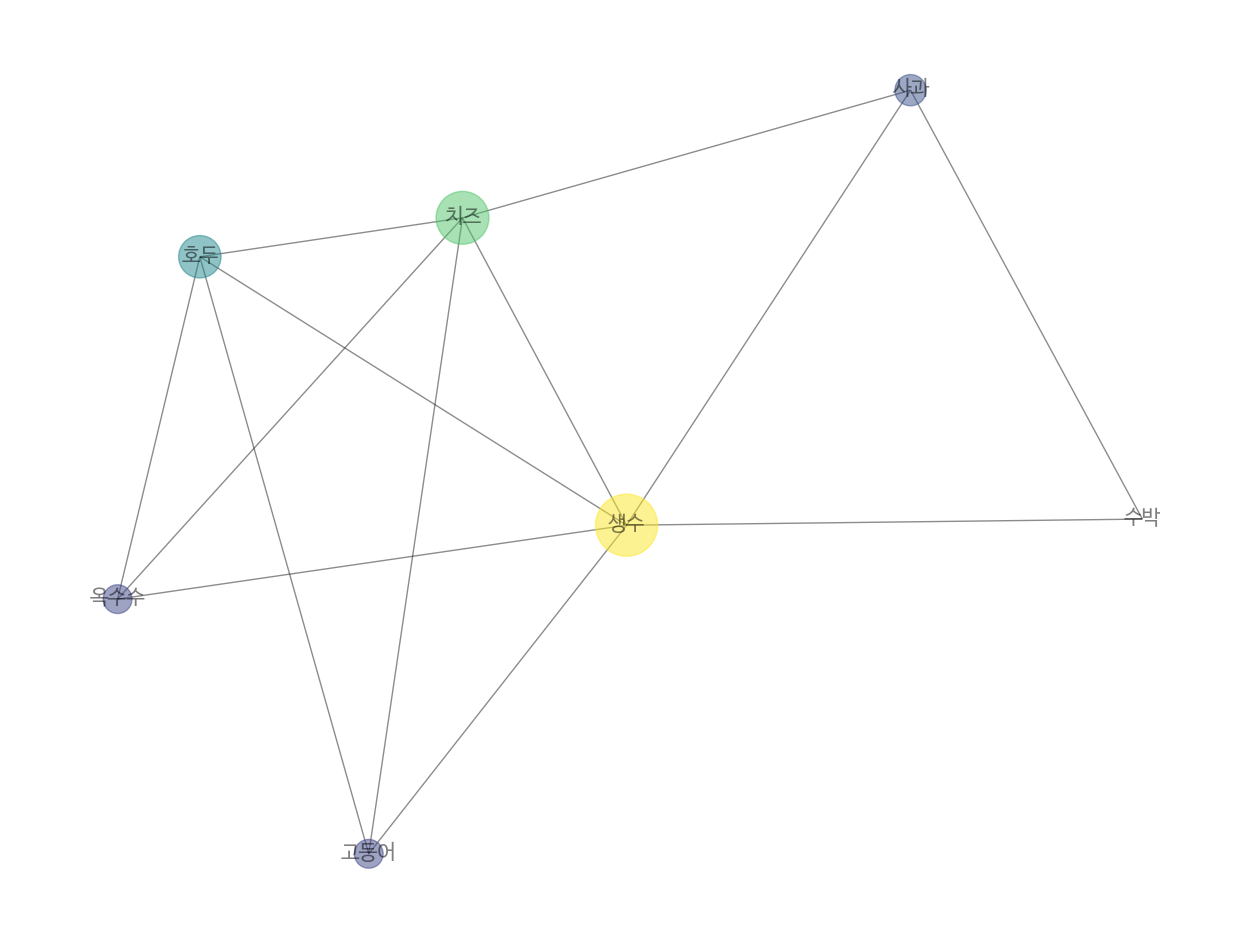

In [30]:
# 한글폰트 설정
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
plt.figure(figsize=(16,12)); plt.axis('off')

fname = fm.FontProperties().get_name()
#alpha값이 1이면 투명도 없음. 동그라미(노드)안의 글자의 투명도가 없음.
#0에 가까울수록 투명해지면서 아래의 선이 같이 표시됨

#edge_color='1' 이면 선색상 안나옴. 
#camp=plt.cm.YlGN 은 전체 색상톤


nx.draw_networkx(G,  node_color=list(pr.values()), node_size=nsize,
                 alpha=0.5, edge_color='0.1', #cmap=plt.cm.YlGn,
                 font_family=fname,font_size=15)

{1: 0.18255882813442864,
 2: 0.18255882813442864,
 3: 0.30227235186908474,
 4: 0.1281116512637307,
 5: 0.1281116512637307,
 0: 0.07638668933459647}

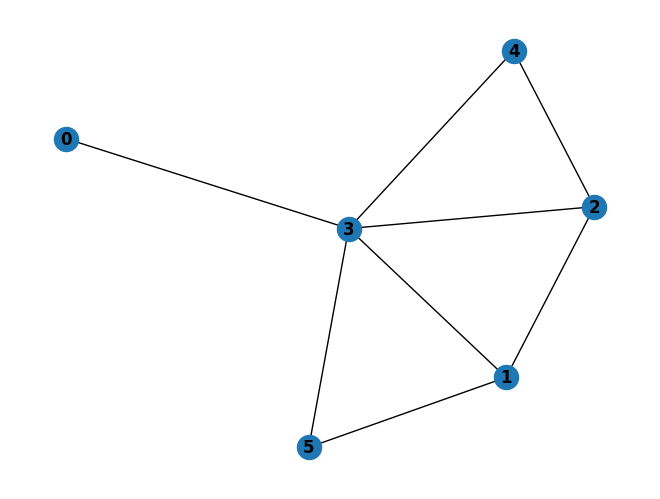

In [31]:
#####################################################
## 참고
## https://stackoverflow.com/questions/42224302/incorrect-pagerank-calculation-result
######################################################
import networkx as nx
from networkx.algorithms.community import greedy_modularity_communities
from networkx.algorithms.cuts import conductance
# Create a networkx graph object
my_graph = nx.Graph() 
# Add edges to to the graph object
# Each tuple represents an edge between two nodes
my_graph.add_edges_from([
                        (1,2), 
                        (1,3), 
                        (3,4), 
                        (1,5), 
                        (3,5),
                        (4,2),
                        (2,3),
                        (3,0)])


#Draw the resulting graph
nx.draw(my_graph, with_labels=True, font_weight='bold')

import numpy as  np
nx.pagerank(my_graph)


# # Modularity
#c = list(greedy_modularity_communities(my_graph))
#c

▶ Part3. 연관분석 실전
데이터설명: 베이커리에서 판매된 상품의 트랜잭션 기록 데이터
변수: Date(판매일자) / Time(판매시간) / Transaction(고객번호) / Item(판매상품)
판매일자: 2016.10.30 - 2017.04.09

https://programmer-ririhan.tistory.com/190

[3-1] 트랜잭션 상품데이터셋 살펴보기

In [35]:
df=pd.read_csv('BreadBasket_DMS.csv')
df.head()

,Date,Time,Transaction,Item
0,2016-10-30,9:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21293 entries, 0 to 21292
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         21293 non-null  object
 1   Time         21293 non-null  object
 2   Transaction  21293 non-null  int64 
 3   Item         21293 non-null  object
dtypes: int64(1), object(3)
memory usage: 665.5+ KB


In [37]:
df.isna().sum()

Date           0
Time           0
Transaction    0
Item           0
dtype: int64

In [38]:
# 판매빈도수 상위 15개 
tmp=df['Item'].value_counts()[:15]
tmp

Coffee           5471
Bread            3325
Tea              1435
Cake             1025
Pastry            856
NONE              786
Sandwich          771
Medialuna         616
Hot chocolate     590
Cookies           540
Brownie           379
Farm House        374
Muffin            370
Juice             369
Alfajores         369
Name: Item, dtype: int64

<BarContainer object of 15 artists>

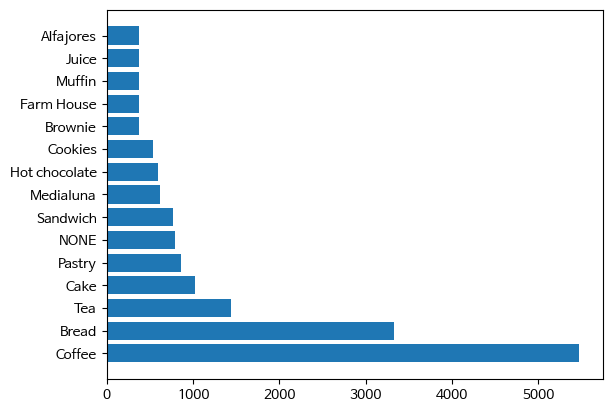

In [39]:
# 판매빈도수 상위 15개 차트
import matplotlib.pyplot as plt
plt.barh(tmp.index,tmp)

Coffee           0.256939
Bread            0.156155
Tea              0.067393
Cake             0.048138
Pastry           0.040201
NONE             0.036914
Sandwich         0.036209
Medialuna        0.028930
Hot chocolate    0.027709
Cookies          0.025360
Brownie          0.017799
Farm House       0.017564
Muffin           0.017377
Juice            0.017330
Alfajores        0.017330
Name: Item, dtype: float64


<BarContainer object of 15 artists>

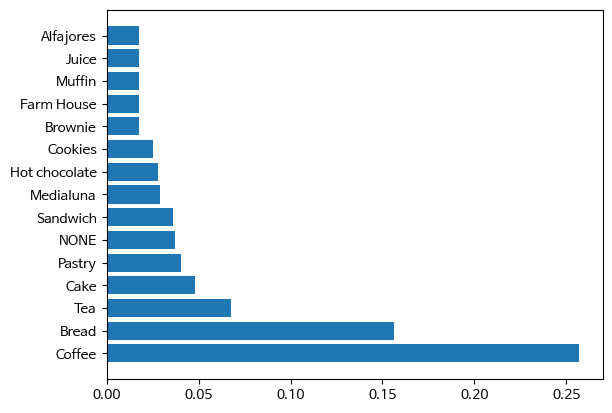

In [40]:
# 판매빈도수 상위15개 % 계산 및 차트
tmp=df['Item'].value_counts()
tmp1=tmp[:15]/len(df)
print(tmp1)

plt.barh(tmp1.index,tmp1)

[3-2] 요일 및 시간별 트랜잭션 분포확인

In [41]:
df['Date']=pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21293 entries, 0 to 21292
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         21293 non-null  datetime64[ns]
 1   Time         21293 non-null  object        
 2   Transaction  21293 non-null  int64         
 3   Item         21293 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 665.5+ KB


In [42]:
df['year']=df['Date'].dt.year
df['month']=df['Date'].dt.month
df['day_name']=df['Date'].dt.day_name()
df['hour']=df['Time'].str.split(':').str[0].astype(int)
df.head()

,Date,Time,Transaction,Item,year,month,day_name,hour
0,2016-10-30,9:58:11,1,Bread,2016,10,Sunday,9
1,2016-10-30,10:05:34,2,Scandinavian,2016,10,Sunday,10
2,2016-10-30,10:05:34,2,Scandinavian,2016,10,Sunday,10
3,2016-10-30,10:07:57,3,Hot chocolate,2016,10,Sunday,10
4,2016-10-30,10:07:57,3,Jam,2016,10,Sunday,10


<Axes: xlabel='hour', ylabel='count'>

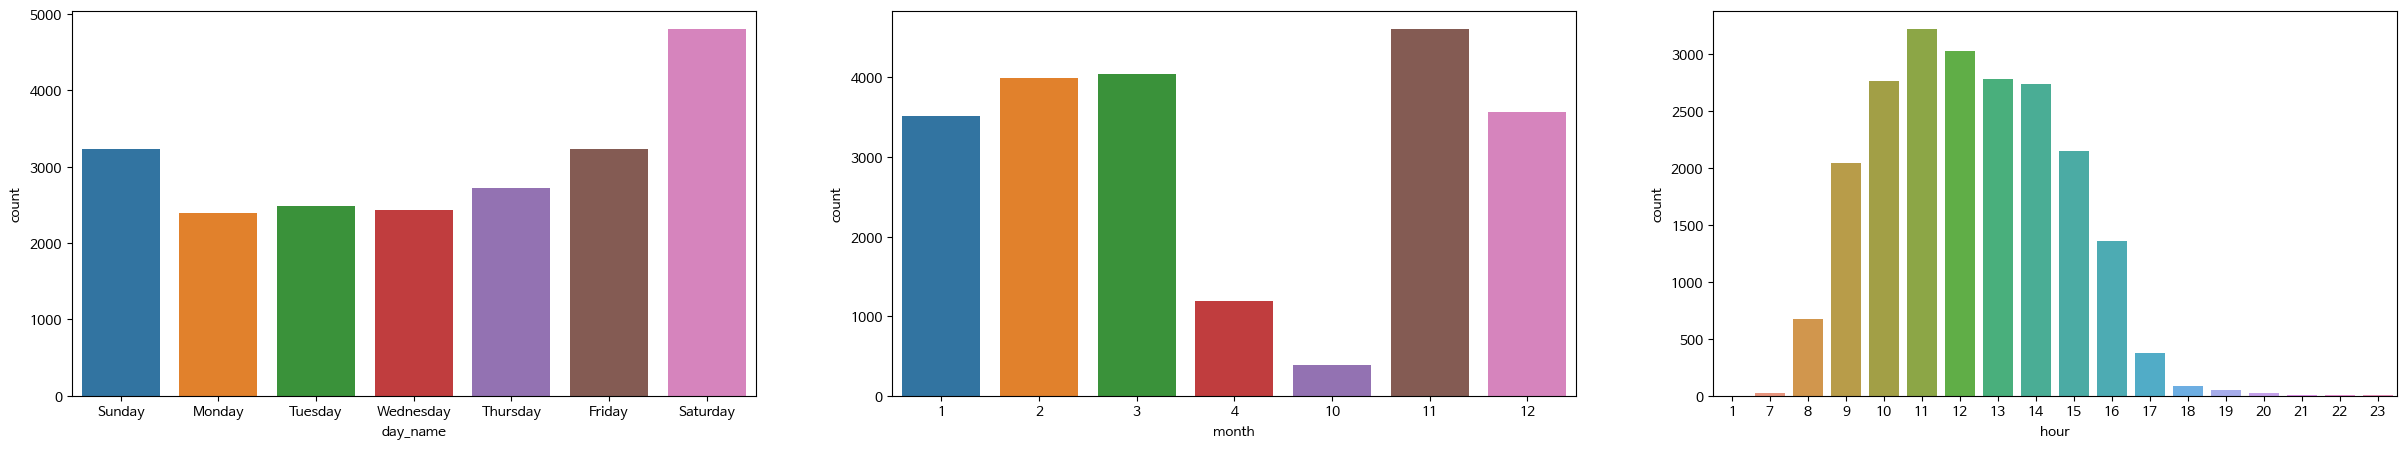

In [43]:
#########################################################
## 베이커리의 손님 대부분이 토요일에 손님 많음
##  데이터가 2016.10.30 - 2017.04.09 사이의 데이터이기 때문에 4월과 10월의 데이터가 적을 수 밖에 없음
## 오전 8시에서 오후 5시 사이에 분포함을 볼 수 있으며, 특히 오전 11시 경에 손님이 가장 분빔
########################################################
plt.figure(figsize=(30,5))
import seaborn as sns

plt.subplot(1,3,1)
sns.countplot(x='day_name',data=df)


plt.subplot(1,3,2)
sns.countplot(x='month',data=df)


plt.subplot(1,3,3)
sns.countplot(x='hour',data=df)

[3-3] 연관분석 데이터셋으로 변환
TransactionEncoder 에 사용될수 있는 list구조로 변환

In [45]:
#########################################################
###  고객번호 최대값 확인
#########################################################
cnt=df['Transaction'].max()
cnt
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21293 entries, 0 to 21292
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         21293 non-null  datetime64[ns]
 1   Time         21293 non-null  object        
 2   Transaction  21293 non-null  int64         
 3   Item         21293 non-null  object        
 4   year         21293 non-null  int64         
 5   month        21293 non-null  int64         
 6   day_name     21293 non-null  object        
 7   hour         21293 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 1.3+ MB


In [46]:
#########################################################
###  데이터프레임 list로 변경
#########################################################

df_tmp=df[['Transaction','Item']]
df_tmp_arr=[[]for i in range(cnt+1)]
num=0

for i in df_tmp['Item'] :
    df_tmp_arr[df_tmp['Transaction'][num]].append(i)
    num+=1
df_tmp_arr[:5]

[[],
 ['Bread'],
 ['Scandinavian', 'Scandinavian'],
 ['Hot chocolate', 'Jam', 'Cookies'],
 ['Muffin']]

In [47]:
df[df['Transaction']==5]

,Date,Time,Transaction,Item,year,month,day_name,hour
7,2016-10-30,10:13:03,5,Coffee,2016,10,Sunday,10
8,2016-10-30,10:13:03,5,Pastry,2016,10,Sunday,10
9,2016-10-30,10:13:03,5,Bread,2016,10,Sunday,10


In [49]:
df_tmp_arr.pop(0) #첫번째는 고객 정보 없으므로 제거
num=0
for i in df_tmp_arr :
    df_tmp_arr[num] = list(set(df_tmp_arr[num]))  # set은 중복제거하는 파이썬 내부명령어, 인덱싱이 불가능해서 list구조로 변경해야함
    num+=1
df_tmp_arr[:15]

[['Scandinavian'],
 ['Jam', 'Cookies', 'Hot chocolate'],
 ['Muffin'],
 ['Coffee', 'Bread', 'Pastry'],
 ['Medialuna', 'Muffin', 'Pastry'],
 ['Tea', 'Coffee', 'Pastry', 'Medialuna'],
 ['Bread', 'Pastry'],
 ['Muffin', 'Bread'],
 ['Medialuna', 'Scandinavian'],
 ['Medialuna', 'Bread', 'NONE'],
 ['Tea', 'Tartine', 'Pastry', 'Jam', 'Coffee'],
 ['Basket', 'Coffee', 'Bread'],
 ['Medialuna', 'Bread', 'Pastry'],
 ['Scandinavian', 'Mineral water', 'NONE'],
 ['Coffee', 'Bread', 'Medialuna']]

[3-4] 연관규칙 생성

In [52]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

te = TransactionEncoder()
te_ary = te.fit(df_tmp_arr).transform(df_tmp_arr)
df = pd.DataFrame(te_ary, columns=te.columns_)
#df.info()
len(df.columns)

95

In [53]:
frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.319736,(Bread)
1,0.101518,(Cake)
2,0.467624,(Coffee)
3,0.139420,(Tea)


In [54]:
# 지지도(support) : 전체 항목 중(행들 중) x와 y를 모두 포함하는 경우의 비율
# 신뢰도(confidence): : x가 있을 때 y도 있는 비율(조건부 확률)
support_list=[0.005, 0.01, 0.05, 0.1]
con_list=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]


total=[]
for i in support_list:
  frequent_itemsets = apriori(df, min_support=i, use_colnames=True)
  row=[]
  for j in con_list:
    tmp= association_rules(frequent_itemsets, metric="confidence", min_threshold=j)
    row.append(len(tmp))
  total.append(row)
total

[[119, 62, 38, 28, 19, 4, 2, 1, 0],
 [42, 31, 18, 15, 12, 1, 1, 0, 0],
 [4, 2, 1, 1, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0]]

In [55]:
total[0]

[119, 62, 38, 28, 19, 4, 2, 1, 0]

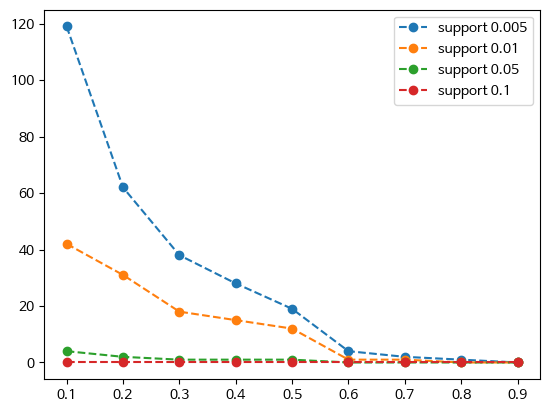

In [56]:
###################################################
## 지지도 10%, 5%의 경우 생성되는 규칙이 매우 적음 
##  지지도 0.5%의 경우 생성되는 규칙이 너무 많음
##  적정선인 지지도 1%를 선택하고자함.  
## 최소 50%의 신뢰도에서 15개 정도의 규칙이 생성되므로 
## 그 이상으로 신뢰도를 선택하고자함.
####################################################

con_list=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
support_list=[0.005, 0.01, 0.05, 0.1]

for y,name in zip(total,support_list):

  plt.plot(con_list,y,'o',linestyle='dashed', label='support ' + str(name))
  plt.legend()

In [57]:
################################################################################
### 최소 지지도 1%(0.01), 최소 신뢰도 50%(0.05) 이상인 연관 규칙들을 생성
################################################################################

frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)
rules= association_rules(frequent_itemsets, metric="confidence", min_threshold=0.05)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Alfajores),(Bread),0.035526,0.319736,0.010121,0.284884,0.890998,-0.001238,0.951264
1,(Alfajores),(Coffee),0.035526,0.467624,0.019209,0.540698,1.156267,0.002596,1.159098
2,(Brownie),(Bread),0.039141,0.319736,0.010534,0.269129,0.841724,-0.001981,0.930759
3,(Cake),(Bread),0.101518,0.319736,0.022824,0.224822,0.703150,-0.009635,0.877559
4,(Bread),(Cake),0.319736,0.101518,0.022824,0.071382,0.703150,-0.009635,0.967548


[3-5] 연관규칙 해석 및 차트작성

In [58]:
# 신뢰도값으로 확인
rules.sort_values(by='confidence', ascending=False)[:10]

# 해석
# Toast를 산 손님의 70%가(confidence)가 coffe를 구매하였음
# spanish Brunch 산 손님의 60%가 coffee를 구매하였음.

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
45,(Toast),(Coffee),0.032841,0.467624,0.023133,0.704403,1.506345,0.007776,1.801018
42,(Spanish Brunch),(Coffee),0.017763,0.467624,0.010637,0.598837,1.280596,0.002331,1.327083
32,(Medialuna),(Coffee),0.060415,0.467624,0.034390,0.569231,1.217284,0.006139,1.235874
37,(Pastry),(Coffee),0.084168,0.467624,0.046473,0.552147,1.180751,0.007114,1.188731
1,(Alfajores),(Coffee),0.035526,0.467624,0.019209,0.540698,1.156267,0.002596,1.159098
30,(Juice),(Coffee),0.037695,0.467624,0.020138,0.534247,1.142471,0.002511,1.143043
35,(NONE),(Coffee),0.077765,0.467624,0.041413,0.532537,1.138814,0.005048,1.138862
38,(Sandwich),(Coffee),0.070226,0.467624,0.037385,0.532353,1.138422,0.004546,1.138415
20,(Cake),(Coffee),0.101518,0.467624,0.053496,0.526958,1.126885,0.006024,1.125432
40,(Scone),(Coffee),0.033771,0.467624,0.017660,0.522936,1.118283,0.001868,1.115943


In [59]:
# 향상도값으로 확인
rules.sort_values(by='lift', ascending=False)[:10]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
23,(Hot chocolate),(Cake),0.057007,0.101518,0.011154,0.195652,1.927263,0.005366,1.117032
22,(Cake),(Hot chocolate),0.101518,0.057007,0.011154,0.109868,1.927263,0.005366,1.059385
47,(NONE),(Tea),0.077765,0.139420,0.017970,0.231076,1.657412,0.007128,1.119200
46,(Tea),(NONE),0.139420,0.077765,0.017970,0.128889,1.657412,0.007128,1.058688
24,(Cake),(Tea),0.101518,0.139420,0.023237,0.228891,1.641743,0.009083,1.116030
25,(Tea),(Cake),0.139420,0.101518,0.023237,0.166667,1.641743,0.009083,1.078178
45,(Toast),(Coffee),0.032841,0.467624,0.023133,0.704403,1.506345,0.007776,1.801018
53,(Pastry),"(Coffee, Bread)",0.084168,0.087989,0.010947,0.130061,1.478150,0.003541,1.048362
50,"(Coffee, Bread)",(Pastry),0.087989,0.084168,0.010947,0.124413,1.478150,0.003541,1.045963
49,(Tea),(Sandwich),0.139420,0.070226,0.014045,0.100741,1.434519,0.004254,1.033933


In [60]:
!pip install apyori
!pip install networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [61]:
#df_tmp_arr[:15]

In [62]:
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x)) 
tmp=frequent_itemsets[frequent_itemsets['length'] ==2] 
tmp

,support,itemsets,length
31,0.010121,"(Bread, Alfajores)",2
32,0.019209,"(Coffee, Alfajores)",2
33,0.010534,"(Brownie, Bread)",2
34,0.022824,"(Cake, Bread)",2
35,0.087989,"(Coffee, Bread)",2
36,0.014149,"(Cookies, Bread)",2
37,0.013116,"(Hot chocolate, Bread)",2
38,0.016524,"(Medialuna, Bread)",2
39,0.020242,"(Bread, NONE)",2
40,0.028504,"(Bread, Pastry)",2


In [63]:
ar=tmp['itemsets']

import networkx as nx
G=nx.Graph()
G.add_edges_from(ar)


import numpy as  np
pr=nx.pagerank(G)
pr

{'Bread': 0.15867559974217835,
 'Alfajores': 0.03401795402080666,
 'Coffee': 0.2684748359987527,
 'Brownie': 0.03401795402080666,
 'Cake': 0.05965950792278901,
 'Cookies': 0.03401795402080666,
 'Hot chocolate': 0.04669568599129706,
 'Medialuna': 0.03401795402080666,
 'NONE': 0.046428929913718595,
 'Pastry': 0.03401795402080666,
 'Sandwich': 0.046428929913718595,
 'Tea': 0.07300575165494495,
 'Juice': 0.02175683145976124,
 'Muffin': 0.02175683145976124,
 'Scone': 0.02175683145976124,
 'Soup': 0.02175683145976124,
 'Spanish Brunch': 0.02175683145976124,
 'Toast': 0.02175683145976124}

In [64]:
nsize=np.array([v for v in pr.values()])
nsize=2000*(nsize-min(nsize))/(max(nsize)-min(nsize))
print(len(nsize))

18


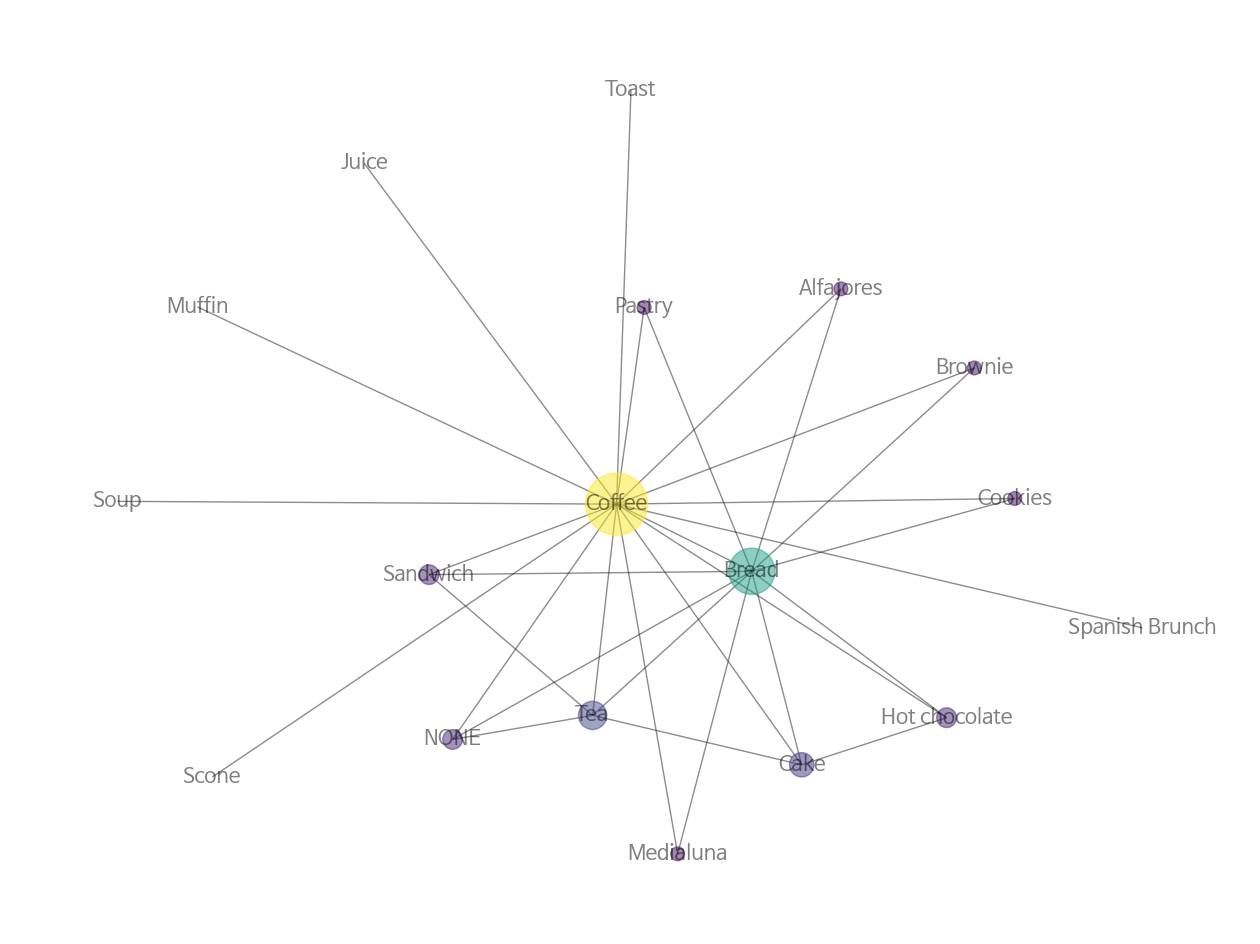

In [65]:
# 한글폰트 설정
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
plt.figure(figsize=(16,12)); plt.axis('off')

fname = fm.FontProperties().get_name()
#alpha값이 1이면 투명도 없음. 동그라미(노드)안의 글자의 투명도가 없음.
#0에 가까울수록 투명해지면서 아래의 선이 같이 표시됨

#edge_color='1' 이면 선색상 안나옴. 
#camp=plt.cm.YlGN 은 전체 색상톤


nx.draw_networkx(G, node_color=list(pr.values()), node_size=nsize,
                 alpha=0.5, edge_color='0.1', #cmap=plt.cm.YlGn,
                 font_family=fname,font_size=15)